<a href="https://colab.research.google.com/github/amanullah20/ML/blob/main/custom_business_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1: Understand Project Requirements**

This is a crucial step to set the foundation for the project. Breaking it down into actionable points
ensures clarity and focus:


_________________________________________

### **Define Objectives**

- Identify the purpose of the project:

 - Analyze customer behavior using key metrics like
Customer_Satisfaction and Return_Status.

 - Predict Total_Price for forecasting revenue.

 - Classify Return_Status to understand patterns in product returns.

 _______________________________________

### **Determine Key Metrics**

- For **Regression Models:**

 - Use metrics like `Mean Absolute Error (MAE)`, `Root Mean Squared Error (RMSE)`:
   - **MAE:** $\frac{1}{n}\sum_{i=1}^{n}\left [ y_i-y\bar{}_i \right ]$

   - **RMSE:** $ \sqrt{\tfrac{1}{n}\sum_{i=1}^{n}(y_i - y\bar{}_i)} $

For **Classification Models:**

Evaluate accuracy, precision, recall, and F1-score:

   - Accuracy: $\frac{TP+TN}{TP+TN+FP+FN}$
____________________________________________________________________________

### **Understand Dataset Scope**

#### **Dataset Highlights:**

 - 50,000 rows, 20 columns.

 - Features include transaction details (Transaction_ID, Date), customer demographics (Customer_Age, Customer_Gender), and financial data (Product_Price, Total_Price).

 - Synthetic dataset—safe for public use.

#### **Anticipated Challenges:**

 - Missing values in columns like Date, Product_ID.

 - Outliers in numerical fields such as Product_Price.

 ___________________________________________________________________________
  

### **Identify Tasks**

#### **Data Preprocessing:**

  - Handle missing values.

  - Encode categorical variables (e.g., Payment_Method).

#### **Feature Engineering:**

  - Example: Calculate
Discounted_Price:

  - Formula:
  
   $DiscountedPrice= Product\underline{}Price * (1 - \frac{Discount}{100})$

#### **EDA:**

Explore trends in Profit_Margin (%) across different Store_Location.
Analyze seasonality in transactions using Date.

_______________________________________________________________________________


### **Define Deliverables**

#### **Visualization Dashboard:**

  - Visualize trends in revenue and product performance.

#### **Predictive Models:**

  - Regression: Predict Total_Price.
  - Classification: Identify patterns in Return_Status.

#### **Insights:**

  - Recommendations for business strategies based on analysis.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import make_scorer,mean_absolute_error,mean_squared_error,accuracy_score,f1_score,precision_score,recall_score,r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer


In [2]:
datasets='/content/Custom_Business_Data_1.csv'
business_data = pd.read_csv(datasets)

In [3]:
# 01. Understand Dataset Scope
# Display basic information about the dataset
print('Dataset information : ')
print(business_data.info())

Dataset information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transaction_ID         50000 non-null  object 
 1   Date                   49829 non-null  object 
 2   Customer_ID            50000 non-null  object 
 3   Customer_Age           50000 non-null  int64  
 4   Customer_Gender        49973 non-null  object 
 5   Product_ID             49969 non-null  object 
 6   Product_Category       50000 non-null  object 
 7   Product_Price          49954 non-null  float64
 8   Quantity               49991 non-null  float64
 9   Discount (%)           50000 non-null  int64  
 10  Payment_Method         49983 non-null  object 
 11  Store_Location         50000 non-null  object 
 12  Employee_ID            49946 non-null  object 
 13  Sales_Channel          50000 non-null  object 
 14  Advertising_Cost       49982 no

In [4]:
# First five rows
print('\nFirst 5 rows of the datasets')
print(business_data.head())


First 5 rows of the datasets
  Transaction_ID        Date Customer_ID  Customer_Age Customer_Gender  \
0        T000001   7/15/2020       C5353            44          Female   
1        T000002    9/5/2023       C3613            22            Male   
2        T000003  11/26/2023       C9123            23          Female   
3        T000004   1/20/2020       C3513            32             NaN   
4        T000005    9/9/2020       C1966            22             NaN   

  Product_ID Product_Category  Product_Price  Quantity  Discount (%)  \
0       P251       Home Decor          97.92       9.0            13   
1        P98        Groceries         256.51      18.0            42   
2        P97       Home Decor         344.73      15.0            10   
3       P288       Home Decor         381.69       9.0             1   
4       P172        Groceries         448.53       3.0             5   

  Payment_Method Store_Location Employee_ID Sales_Channel  Advertising_Cost  \
0           C

In [5]:
# Summary Statistics
print('\nSummary Statistics')
print(business_data.describe())


Summary Statistics
       Customer_Age  Product_Price      Quantity  Discount (%)  \
count  50000.000000   49954.000000  49991.000000  50000.000000   
mean      43.465460     253.164966     10.005741     24.496220   
std       14.978456     143.019396      5.482576     14.455561   
min       18.000000       5.000000      1.000000      0.000000   
25%       31.000000     130.382500      5.000000     12.000000   
50%       43.000000     252.920000     10.000000     24.000000   
75%       56.000000     377.082500     15.000000     37.000000   
max       69.000000     500.000000     19.000000     49.000000   

       Advertising_Cost  Profit_Margin (%)  Customer_Satisfaction  \
count      49982.000000       49993.000000           50000.000000   
mean         500.731548          16.952613               3.005640   
std          286.642482           7.223639               1.415927   
min            0.020000           5.000000               1.000000   
25%          252.912500          11.0000

In [6]:
# Check for missing values
missing_values = business_data.isnull().sum()
print('\nMissing values in Each Columns:')
print(missing_values)


Missing values in Each Columns:
Transaction_ID             0
Date                     171
Customer_ID                0
Customer_Age               0
Customer_Gender           27
Product_ID                31
Product_Category           0
Product_Price             46
Quantity                   9
Discount (%)               0
Payment_Method            17
Store_Location             0
Employee_ID               54
Sales_Channel              0
Advertising_Cost          18
Profit_Margin (%)          7
Return_Status              0
Customer_Satisfaction      0
Annual_Income             30
Total_Price                0
dtype: int64


### 02. Key Insights about Dataset

In [7]:
# Number of unique values in each columns
unique_values = business_data.nunique()
print('\nUnique values in Each column: ')
print(unique_values)


Unique values in Each column: 
Transaction_ID           50000
Date                      1461
Customer_ID               8972
Customer_Age                52
Customer_Gender              2
Product_ID                 500
Product_Category             5
Product_Price            31518
Quantity                    19
Discount (%)                50
Payment_Method               3
Store_Location               5
Employee_ID                900
Sales_Channel                2
Advertising_Cost         39307
Profit_Margin (%)           25
Return_Status                2
Customer_Satisfaction        5
Annual_Income            49862
Total_Price              46961
dtype: int64


### 03. Exploratory Data Analysis (EDA)

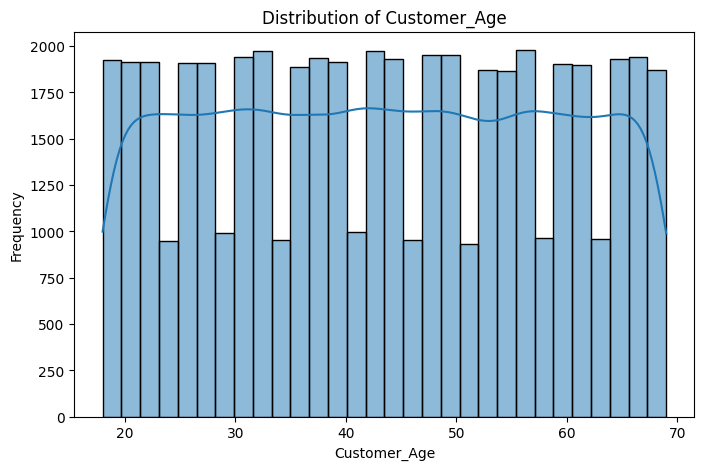

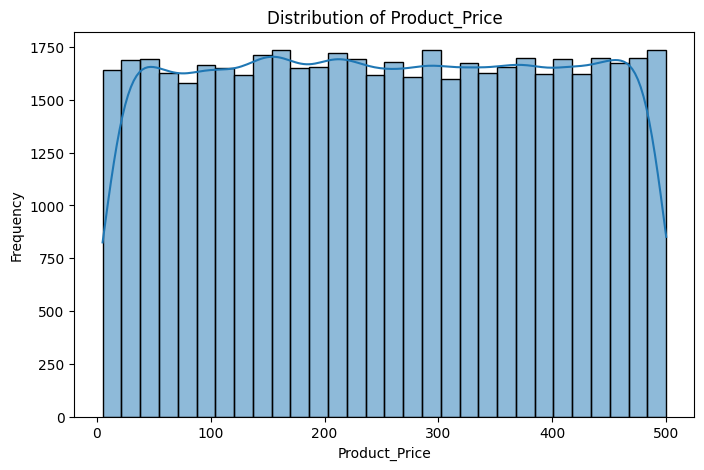

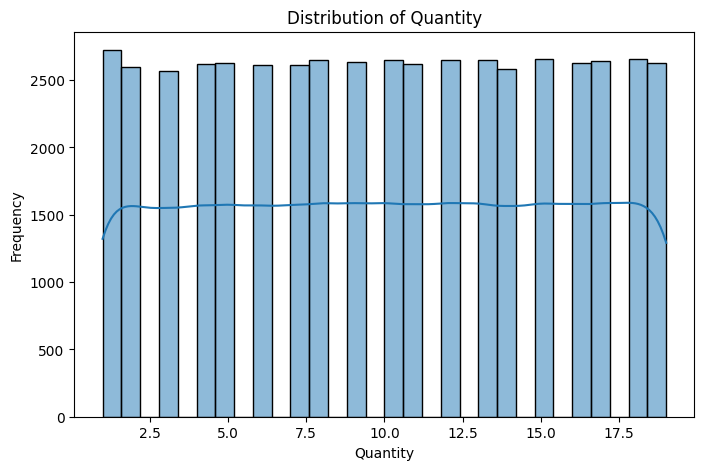

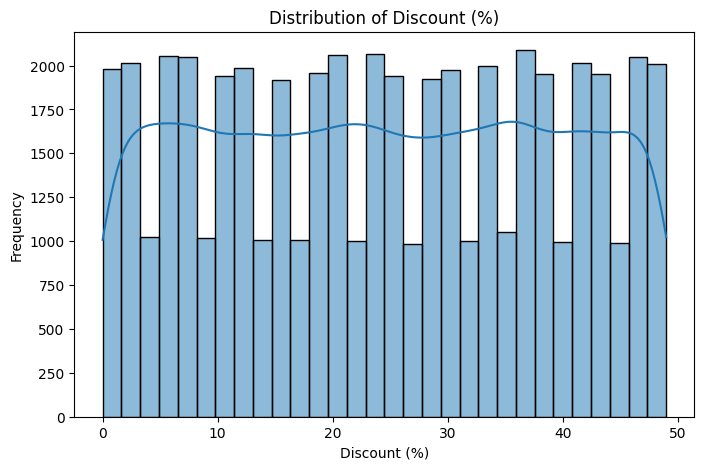

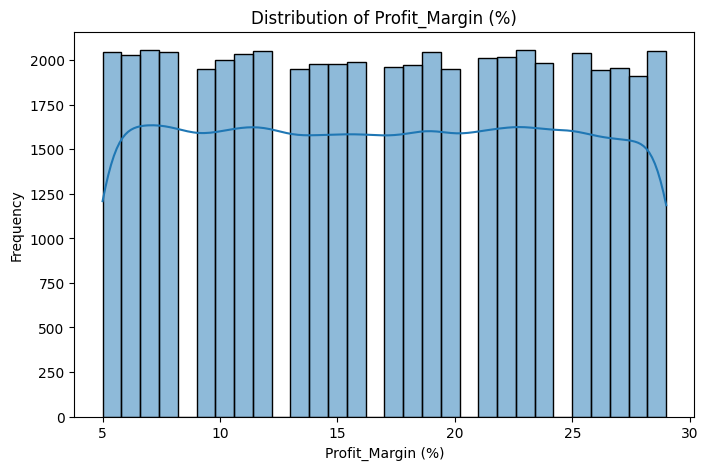

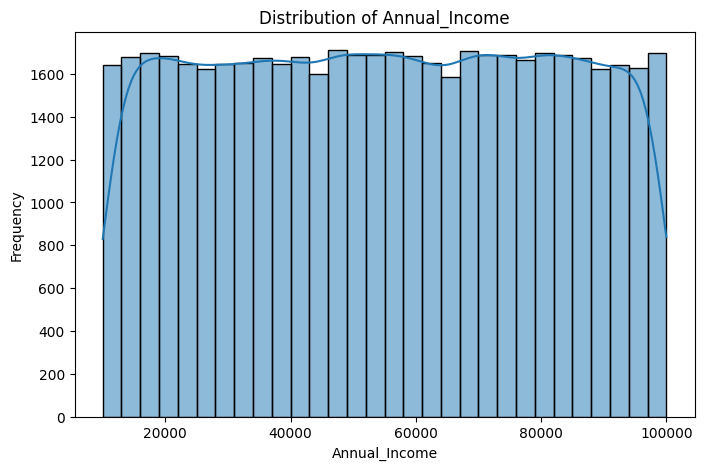

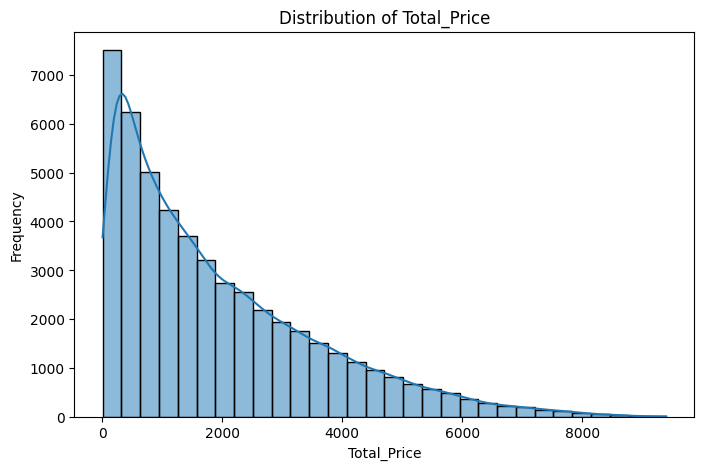

In [8]:
# Distribution of numerical features
numerical_features = ['Customer_Age','Product_Price', 'Quantity', 'Discount (%)', 'Profit_Margin (%)', 'Annual_Income', 'Total_Price']
for feature in numerical_features:
  plt.figure(figsize=(8,5))
  sns.histplot(business_data[feature],kde=True,bins=30)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

### 04. Initial Feature Engineering Example

In [9]:
# Calculate Discounted Price
business_data['Discounted_Price'] = business_data['Product_Price'] * (1 - (business_data['Discount (%)'] / 100))

# Display  first few rows with the new column
print('\nFirst 5 rows with Discounted_price')
print(business_data[['Product_Price','Discount (%)', 'Discounted_Price']])


First 5 rows with Discounted_price
       Product_Price  Discount (%)  Discounted_Price
0              97.92            13           85.1904
1             256.51            42          148.7758
2             344.73            10          310.2570
3             381.69             1          377.8731
4             448.53             5          426.1035
...              ...           ...               ...
49995         422.05            43          240.5685
49996         138.13            30           96.6910
49997         456.88             1          452.3112
49998         303.99            40          182.3940
49999          59.68            25           44.7600

[50000 rows x 3 columns]


### 05. Trends in Profit_margin (%) by Store Location

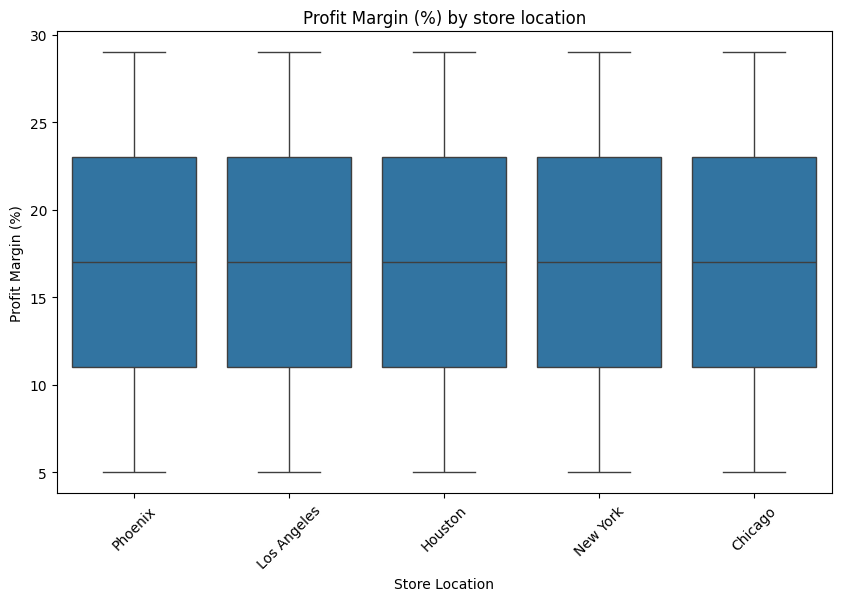

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=business_data,x='Store_Location', y='Profit_Margin (%)')
plt.title('Profit Margin (%) by store location')
plt.xlabel('Store Location')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

### 06. Seasonality Analysis in Transactions

In [11]:
# Extract Date , Year and Month from the date comumns
business_data['Date'] = pd.to_datetime(business_data['Date'],errors='coerce')
business_data['Year']= business_data['Date'].dt.year
business_data['Month'] = business_data['Date'].dt.month




In [12]:
# Group Data by year and month
seasonality = business_data.groupby(['Year', 'Month'])['Total_Price'].sum().reset_index()
seasonality_pivot = seasonality.pivot(index='Month', columns='Year', values='Total_Price')

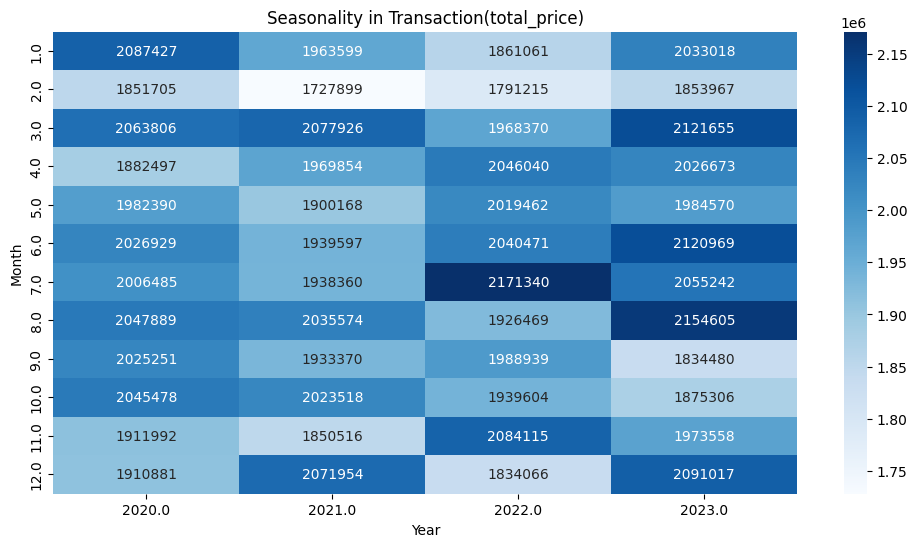

In [13]:
# Plot the seasonality trend
plt.figure(figsize=(12,6))
sns.heatmap(seasonality_pivot,cmap='Blues',annot=True,fmt='.0f')
plt.title('Seasonality in Transaction(total_price)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

### Save the data

In [14]:
# Save the processed dataset for future use
# business_data.to_csv('processed_business_data.csv',index=False)
# print('\nProcessed dataset saved as processed_business_data.csv')

### **Step 2: Data Preprocessing**

Data preprocessing is essential to clean and prepare the dataset for analysis and modeling. Below are the key steps and subpoints:
___________________________________________

### **2.1 Handle Missing Values**

 - Identify columns with missing data.
 - Use appropriate strategies based on data types:

   1.**Numerical Columns:**
    
     - Impute missing values with the mean or median:
  $x\underline{}mean= \frac{1}{n}\sum_{i=1}^{n}x_i$

     $x\underline{}median = middle\: value$


   2**.Categorical Columns:**

  - Impute with the
mode (most frequent category) or create an "Unknown" category.
_____________________________________________________________________________



### **2.2 Handle Outliers**

 - Detect and treat outliers using:

  - **Z-Score Method:** $z_i = \frac{x_i - \mu }{\sigma } $ - If $\left | z_i\right |>3$ , consider the value an outlier.

   - **IQR Method:** , where:
    - $Q_1=25th\: percentile$
    - $Q_3= 75th\: percentile  $

    - Outlier thresholds:

      - Lower Bound: $Q_1 - 1.5 * IQR
$
      - Upper Bound: $Q_3 + 1.5 * IQR$

 ________________________________________

# 2.3 Encode Categorical Data

 - Convert categorical variables into numerical values using:

  - One-Hot Encoding:

     - For a category
   with 3 levels (A, B, C), create binary columns:

     - x_A, x_B, x_C where:

      - x_A = 1 if x is A; otherwise 0.

  - Label Encoding:

    - Assign integers: A = 1, B = 2, C = 3.

____________________________________________

### **2.4 Normalize Numerical Features**

 - Scale numerical data to ensure consistent ranges:

**Min-Max Scaling:**

$x'=\frac{x-\text{min}(x)}{\text{max}(x)-\text{min}(x)}$

**Standardization:**$
x'=\frac{x-\mu}{\sigma}$
___________________________________________

### **2.5 Handle Duplicate Records**

 - Check for duplicates:

  - Use duplicated() to identify them.

 - Remove duplicates to maintain data integrity.

### **2.6 Save Preprocessed Data**

 - Export the cleaned dataset for further analysis:

  - Save the preprocessed file using to_csv().

### 1. Handle Missing Values


In [15]:
# impute missing numerical columns with means
numerical_columns = ['Product_Price','Quantity', 'Profit_Margin (%)', 'Advertising_Cost', 'Annual_Income']
for column in numerical_columns:
  business_data[column].fillna(business_data[column].mean(),inplace=True)


<ipython-input-15-2a02e5aeab3b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  business_data[column].fillna(business_data[column].mean(),inplace=True)


In [16]:
# impute missing categorical columns with mode
categorical_columns = ['Customer_Gender', 'Product_ID', 'Payment_Method', 'Employee_ID']
for column in categorical_columns:
  business_data[column].fillna(business_data[column].mode()[0],inplace=True)

<ipython-input-16-da8813f787bb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  business_data[column].fillna(business_data[column].mode()[0],inplace=True)


In [17]:
business_data[categorical_columns].head()

,Customer_Gender,Product_ID,Payment_Method,Employee_ID
0,Female,P251,Card,E886
1,Male,P98,Online,E197
2,Female,P97,Cash,E820
3,Female,P288,Online,E528
4,Female,P172,Online,E599


In [18]:
# impute missing dates with the most frequent date
business_data['Date'].fillna(business_data['Date'].mode()[0],inplace=True)
business_data['Date'].isnull().sum()

0

### **02. Handle Outliers**

In [19]:
# using IQR method for outlier detection
def remove_outliers(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
  return df

for column in numerical_columns:
  business_data = remove_outliers(business_data,column)

# Fill any remaining outliers with the mean
for column in numerical_columns:
  business_data[column].fillna(business_data[column].mean(),inplace=True)

<ipython-input-19-de914c850734>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  business_data[column].fillna(business_data[column].mean(),inplace=True)


### 03. Encode Categorical Data

In [20]:
# One-hot encoding for categorical columns
business_data = pd.get_dummies(business_data, columns=['Customer_Gender', 'Product_Category', 'Payment_Method', 'Sales_Channel'], drop_first=True)


### 04. Normalize Numerical Features

In [21]:
# Min-Max Scaling for numerical columns
scaler = MinMaxScaler()
business_data[numerical_columns]=scaler.fit_transform(business_data[numerical_columns])

### 05. Handle Duplicate Records

In [22]:
# Check for duplicates
duplicates = business_data.duplicated()
print(f'number of duplicate rows: {duplicates}')

number of duplicate rows: 0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool


In [23]:
# Remove duplicates
business_data.drop_duplicates(inplace=True)

### 06. Save preprocessed Data

In [24]:
# Export the cleaned dataset
processed_file_path = 'preprocessed_Business_Data.csv'
business_data.to_csv(processed_file_path,index=False)
print(f'Preprocessed dataset saved as {processed_file_path} ')

Preprocessed dataset saved as preprocessed_Business_Data.csv 


In [25]:
# Display basic information after preprocessing
print('\nPreprocessed Dataset info: ')
print(business_data.info())


Preprocessed Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Transaction_ID                50000 non-null  object        
 1   Date                          50000 non-null  datetime64[ns]
 2   Customer_ID                   50000 non-null  object        
 3   Customer_Age                  50000 non-null  int64         
 4   Product_ID                    50000 non-null  object        
 5   Product_Price                 50000 non-null  float64       
 6   Quantity                      50000 non-null  float64       
 7   Discount (%)                  50000 non-null  int64         
 8   Store_Location                50000 non-null  object        
 9   Employee_ID                   50000 non-null  object        
 10  Advertising_Cost              50000 non-null  float64       
 11 

In [26]:
print('\nFirst 5 rows of preprocessed Data:')
print(business_data.head())


First 5 rows of preprocessed Data:
  Transaction_ID       Date Customer_ID  Customer_Age Product_ID  \
0        T000001 2020-07-15       C5353            44       P251   
1        T000002 2023-09-05       C3613            22        P98   
2        T000003 2023-11-26       C9123            23        P97   
3        T000004 2020-01-20       C3513            32       P288   
4        T000005 2020-09-09       C1966            22       P172   

   Product_Price  Quantity  Discount (%) Store_Location Employee_ID  ...  \
0       0.187717  0.444444            13        Phoenix        E886  ...   
1       0.508101  0.944444            42    Los Angeles        E197  ...   
2       0.686323  0.777778            10    Los Angeles        E820  ...   
3       0.760990  0.444444             1        Houston        E528  ...   
4       0.896020  0.111111             5        Phoenix        E599  ...   

     Year  Month Customer_Gender_Male  Product_Category_Clothing  \
0  2020.0    7.0              

### **Step 3: Exploratory Data Analysis (EDA)**

Exploratory Data Analysis involves investigating the dataset to uncover patterns, trends, and relationships. It sets the stage for feature selection and modeling.

_____________________________________________

### **3.1 Understand the Distribution of Numerical Features**

 - Analyze the distribution of numerical features to understand their spread, skewness, and potential outliers.

  - Example: For a numerical column , compute:

    - Mean:

   $\mu = \frac{1}{n}\sum_{i=1}^{n}x_i$
        

   - Variance:

  $\sigma^2=\frac{1}{n}\sum_{i=1}^{n}(x_i - \mu )^2$


  - Standard Deviation:

  $\sigma = \sqrt{\sigma^2}$
  ___________________________________________________________________________




### **3.2 Analyze Relationships Between Features**

 - Use correlation analysis to measure the linear relationship between two numerical features:

 $r= \frac{\sum_{i=1}^{n}(x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\sum_{i=1}^{n}(x_i - \mu_x)^2}\sqrt{\sum_{i=1}^{n}(y_i - \mu_y)}}$

Correlation Coefficient:

 - Range: $-1 \leq r \leq 1$

Interpretations:

  $r>0 $: Positive correlation.

  $r<0 $: Negative correlation.

  $r=0$: No correlation.
  ______________________________________________________________________________

### **3.3 Visualize Trends in Key Features**

 - **Time-Based Analysis:**

Group by Date to analyze trends in Total_Price:

$T(t)=\sum_{i=1}^{n}Total\underline{}Price_i,\:for\: each\: t$


 - **Category-Based Analysis:**

 - Compute aggregated metrics like mean, median, and sum for features grouped by categories (e.g., Product_Category).

 ____________________________________________________________________________

### **3.4 Analyze Profitability**

 - Calculate total profitability by store location:

Total Profit:
$P = \sum_{i=1}^{n}(Total\underline{}Price_i - Product\underline{}_i). Quantity_i) $

 - Visualize profit margins for each store.

 ______________________________________________________________________________

**3.5 Analyze Customer Behavior**

 - Segment customers based on annual income and satisfaction levels:

  - Mean Annual Income by Satisfaction Level:

 (income_satisfaction) $\mu = \frac{\sum_{i=1}^{n}Annual_Income_i.Satisfaction_i}{\sum_{i=1}^{n}Satisfaction_i}$

 ___________________________________________

### **3.6 Examine Return Status**

 - Analyze patterns in product returns

(Return_Status):

Return Rate: $\frac{TotalReturns}{TotalTransaction}$

_______________________________________________


### **3.7 Summarize Insights**

 - Summarize key findings from visualizations and statistical analyses.

 - Prepare actionable insights for feature selection.

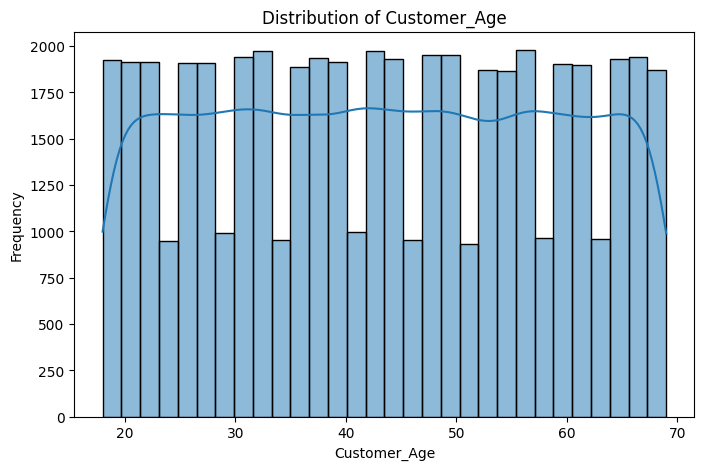

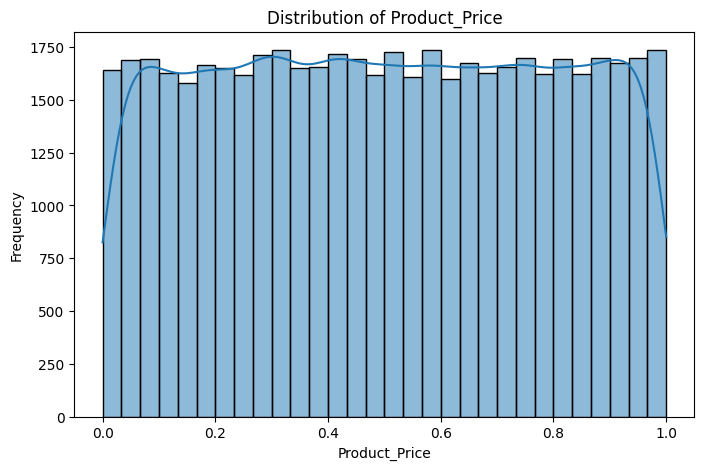

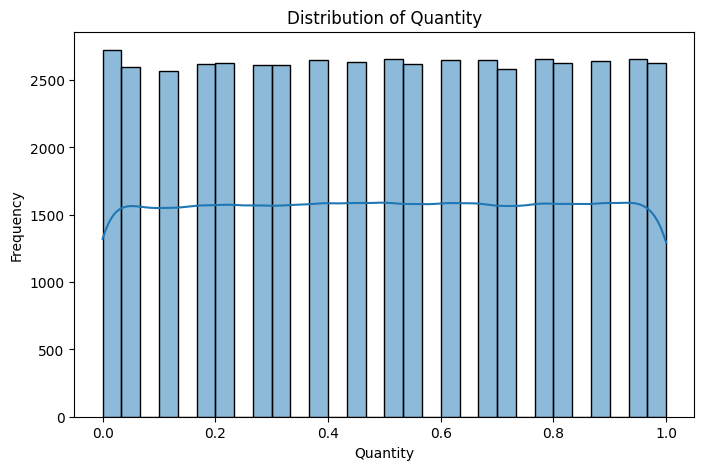

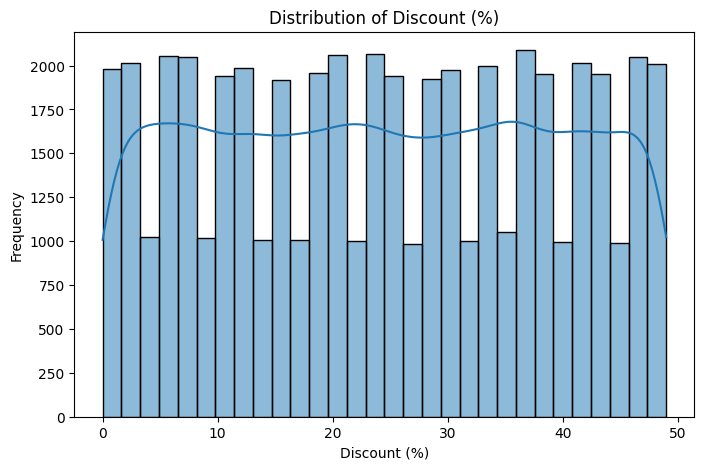

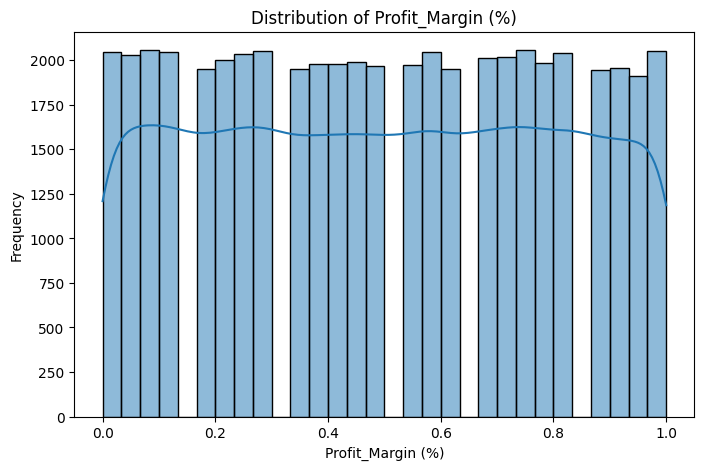

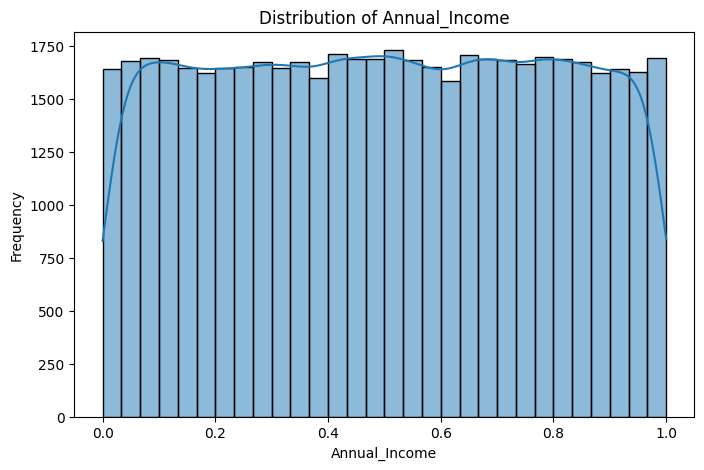

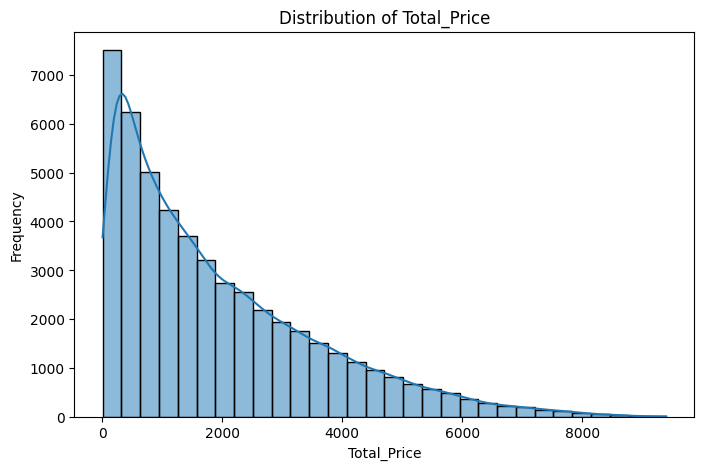

In [27]:
# 1. Understand the Distribution of Numerical Features
numerical_columns = ['Customer_Age', 'Product_Price', 'Quantity', 'Discount (%)',
                     'Profit_Margin (%)', 'Annual_Income', 'Total_Price']

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(business_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

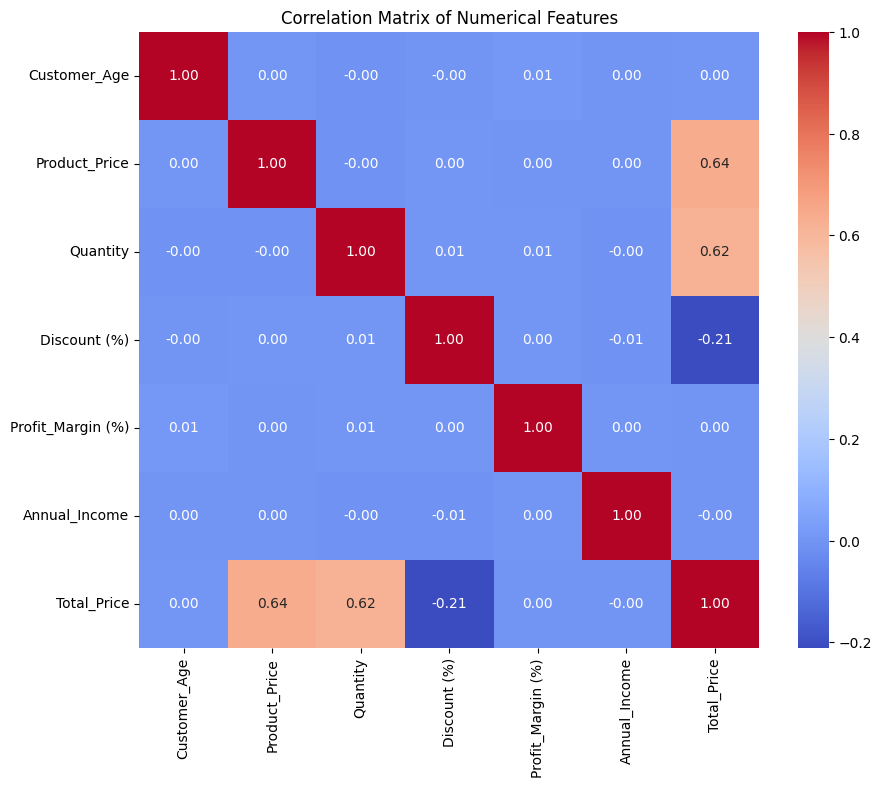

In [28]:
# 2. Analyze Relationships Between Features
# Compute and visualize the correlation matrix
correlation_matrix = business_data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

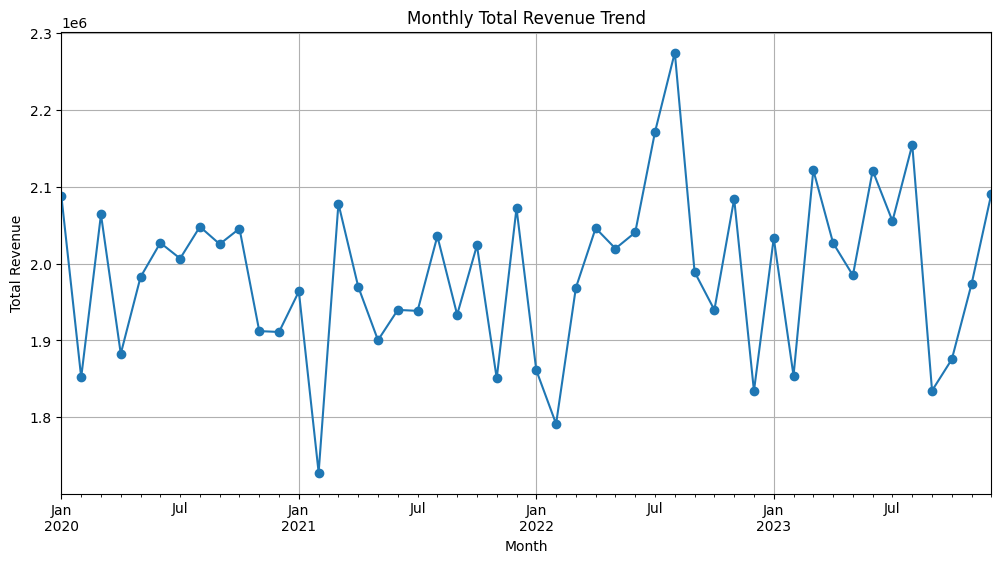

In [29]:
# 3. Visualize Trends in Key Features
# Time-Based Analysis: Group by Date
business_data['Date'] = pd.to_datetime(business_data['Date'], errors='coerce')
time_analysis = business_data.groupby(business_data['Date'].dt.to_period('M'))['Total_Price'].sum()
time_analysis.plot(figsize=(12, 6), marker='o')
plt.title('Monthly Total Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

<ipython-input-30-6fb511cc1f9a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profitability, x='Store_Location', y='Total_Price', palette='viridis')


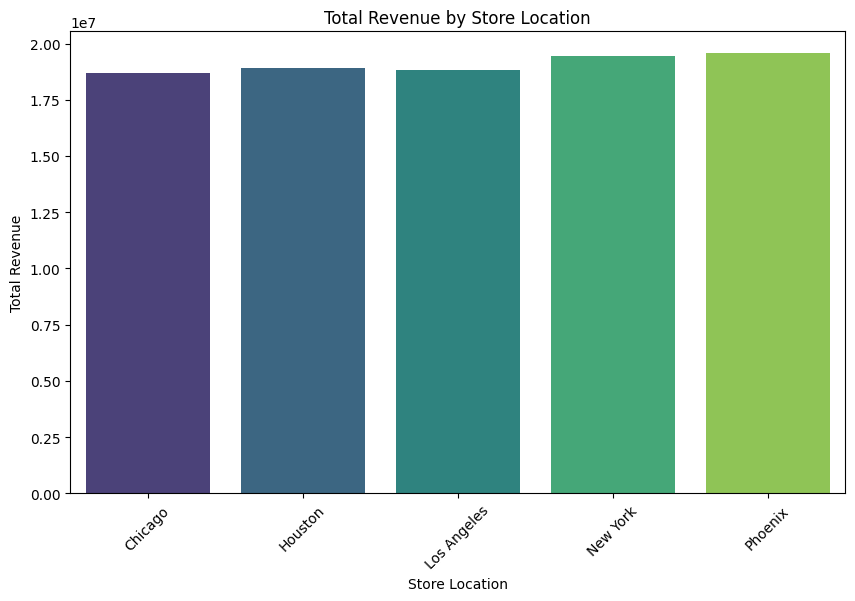

In [30]:
# 4. Analyze Profitability by Store Location
profitability = business_data.groupby('Store_Location')['Total_Price'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=profitability, x='Store_Location', y='Total_Price', palette='viridis')
plt.title('Total Revenue by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

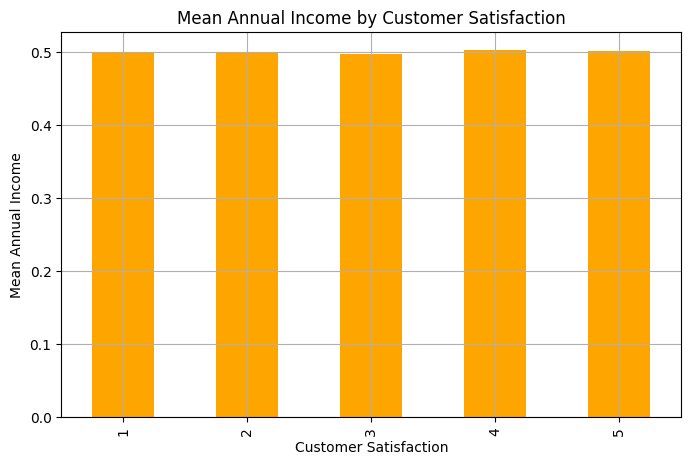

In [31]:
# 5. Analyze Customer Behavior
# Mean Annual Income by Customer Satisfaction
customer_behavior = business_data.groupby('Customer_Satisfaction')['Annual_Income'].mean()
customer_behavior.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Mean Annual Income by Customer Satisfaction')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Mean Annual Income')
plt.grid()
plt.show()

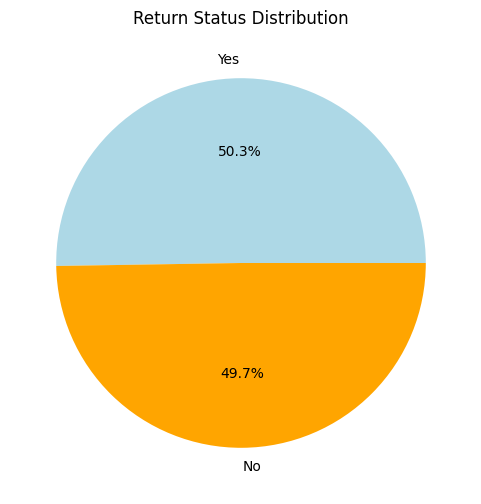

In [32]:
# 6. Examine Return Status
# Calculate Return Rate
return_status = business_data['Return_Status'].value_counts(normalize=True)
return_status.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['lightblue', 'orange'])
plt.title('Return Status Distribution')
plt.ylabel('')
plt.show()

In [33]:
# Summarize Insights
print("\n--- Key Insights ---")
print("1. Monthly Total Revenue Trend: Indicates seasonality and peak sales periods.")
print("2. Correlation Analysis: Strong correlation observed between Total_Price and Quantity.")
print("3. Store Location Revenue: Highlighting top-performing stores.")
print("4. Customer Satisfaction Analysis: Higher satisfaction linked to higher annual incomes.")
print("5. Return Status: Majority of transactions are non-returns.")



--- Key Insights ---
1. Monthly Total Revenue Trend: Indicates seasonality and peak sales periods.
2. Correlation Analysis: Strong correlation observed between Total_Price and Quantity.
3. Store Location Revenue: Highlighting top-performing stores.
4. Customer Satisfaction Analysis: Higher satisfaction linked to higher annual incomes.
5. Return Status: Majority of transactions are non-returns.


### **Step 4: Feature Engineering**

Feature Engineering involves creating new features or modifying existing ones to improve model performance and uncover hidden patterns in the data.

______________________________________________


#### **4.1 Create New Features**

01. Discounted Price:

 - Calculate the price after applying the

 discount:

 $DiscountedPrice= productPrice.(1- \frac{Discount}{100})$

02. Average Spending Per Item:

 - Derive how much the customer spends on average per item:

$AverageSpending = \frac{TotalPrice}{Quantity}$

 - Handle cases where Quantity = 0 by imputing a small value (e.g., 1).

03. Profit:

 - Calculate profit per transaction:

 $Profit = TotalPrice - (ProductPrice.Quantity)$
_____________________________________________

### **4.2 Group-Based Features**

01. **Customer-Based Features:**

Calculate total spending per customer:

$TotalSpending(Customer)=\sum_{i=1}^{n}Total\underline{}Price_i$

Average transaction size for each customer:

$Average\underline{}Transaction(customer)=\frac{Total\underline{}Spending(customer)}{Transaction\underline{}Count}$

#### 02. **Product-Based Features:**

 - Compute average discount given per product:

 $Average\underline{}Discount(product)=\frac{\sum_{i=1}^{n}Discount_i}{Count(product)}$

 ______________________________________________



### **4.3 Categorical Feature Transformation**

01.** Frequency Encoding:**

Encode categories based on their occurrence frequency:

$Frequency(category)=\frac{Count(category)}{Total\underline{}Count}$

02. **Target Encoding:**

 - Encode categories based on the mean target value for each category:

$Target\underline{}Encoding(category) = \frac{\sum_{i=1}^{n}Target_i . \sigma(category)}{\sum_{i=1}^{n}\sigma(category)}$

 - Here,$\sigma(category)$  is an indicator function for a given category.

________________________________________________

### 4.4 **Time-Based Features**

01. **Transaction Month and Year:**

 - Extract Month and Year from the Date column:

$Month = ExtractMonth(Date),Year = ExtractYear(Date)$

02. **Seasonal Features:**

 - Encode seasons:
Winter: 12,1,2
Spring:3,4,5 , etc.

________________________________________________

### 4.5  **Feature Interaction**

### 01. **Interaction Terms:**

 - Combine features to capture relationships:

$Interaction\underline{}Feature = Feature_i.Feature_2$

 - Example: Interaction between Product_Price and Quantity.

### 02. **Ratios:**

 - Create ratios for comparisons: $Ratio = \frac{Feature_1}{Feature_2}$

 ___________________________________________

### **4.6 Remove Redundant Features**

 - Identify features that are highly correlated or irrelevant using:

  - Variance Inflation Factor (VIF): $VIF = \frac{1}{1 - R^2}$

  - Remove features with high multicollinearity.

  __________________________________________

In [34]:
datasets = '/content/Custom_Business_Data_1.csv'
business_data = pd.read_csv(datasets)
# 1. Create New Features
# Discounted Price
business_data['Discounted_Price'] = business_data['Product_Price'] * (1 - (business_data['Discount (%)'] / 100))

# Average Spending Per Item
business_data['Average_Spending'] = business_data['Total_Price'] / business_data['Quantity']
business_data['Average_Spending'].fillna(0, inplace=True)  # Handle cases where Quantity = 0

# Profit
business_data['Profit'] = business_data['Total_Price'] - (business_data['Product_Price'] * business_data['Quantity'])

<ipython-input-34-40ba82f522e2>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  business_data['Average_Spending'].fillna(0, inplace=True)  # Handle cases where Quantity = 0


In [35]:
#2. Group-Based Features
# Total Spending by Customer
customer_spending = business_data.groupby('Customer_ID')['Total_Price'].sum().reset_index()
customer_spending.rename(columns={'Total_Price': 'Total_Spending'}, inplace=True)
business_data = business_data.merge(customer_spending, on='Customer_ID', how='left')

In [36]:
# Average Transaction Size by Customer
transaction_count = business_data.groupby('Customer_ID')['Transaction_ID'].count().reset_index()
transaction_count.rename(columns={'Transaction_ID': 'Transaction_Count'}, inplace=True)
business_data = business_data.merge(transaction_count, on='Customer_ID', how='left')
business_data['Average_Transaction_Size'] = business_data['Total_Spending'] / business_data['Transaction_Count']


In [37]:
# Average Discount per Product
product_discount = business_data.groupby('Product_ID')['Discount (%)'].mean().reset_index()
product_discount.rename(columns={'Discount (%)': 'Average_Discount'}, inplace=True)
business_data = business_data.merge(product_discount, on='Product_ID', how='left')

In [38]:
# 3. Categorical Feature Transformation
# Frequency Encoding for Store_Location
location_frequency = business_data['Store_Location'].value_counts(normalize=True).to_dict()
business_data['Store_Location_Freq'] = business_data['Store_Location'].map(location_frequency)

# Target Encoding for Product_Category (based on Average Profit)
product_category_target = business_data.groupby('Product_Category')['Profit'].mean().to_dict()
business_data['Product_Category_Target'] = business_data['Product_Category'].map(product_category_target)

In [39]:
# 4. Time-Based Features
# Extract Month and Year
business_data['Date'] = pd.to_datetime(business_data['Date'], errors='coerce')
business_data['Month'] = business_data['Date'].dt.month
business_data['Year'] = business_data['Date'].dt.year

# Seasonal Features
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

business_data['Season'] = business_data['Month'].apply(assign_season)

In [40]:
# 5. Feature Interaction
# Interaction between Product_Price and Quantity
business_data['Price_Quantity_Interaction'] = business_data['Product_Price'] * business_data['Quantity']

# Ratios
business_data['Profit_Ratio'] = business_data['Profit'] / business_data['Total_Price']
business_data['Profit_Ratio'].fillna(0, inplace=True)  # Handle division by zero

<ipython-input-40-a19dd6ac184c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  business_data['Profit_Ratio'].fillna(0, inplace=True)  # Handle division by zero


In [41]:
# 6. Remove Redundant Features
# Drop columns with high multicollinearity or irrelevant information
columns_to_drop = ['Transaction_ID', 'Employee_ID', 'Discount (%)']
business_data.drop(columns=columns_to_drop, inplace=True)

# Save the dataset with engineered features
processed_file_path = 'Engineered_Business_Data.csv'
business_data.to_csv(processed_file_path, index=False)
print(f"Feature-engineered dataset saved as '{processed_file_path}'")

# Display a sample of the processed dataset
print("\nSample of Feature-Engineered Data:")
print(business_data.head())

Feature-engineered dataset saved as 'Engineered_Business_Data.csv'

Sample of Feature-Engineered Data:
        Date Customer_ID  Customer_Age Customer_Gender Product_ID  \
0 2020-07-15       C5353            44          Female       P251   
1 2023-09-05       C3613            22            Male        P98   
2 2023-11-26       C9123            23          Female        P97   
3 2020-01-20       C3513            32             NaN       P288   
4 2020-09-09       C1966            22             NaN       P172   

  Product_Category  Product_Price  Quantity Payment_Method Store_Location  \
0       Home Decor          97.92       9.0           Card        Phoenix   
1        Groceries         256.51      18.0         Online    Los Angeles   
2       Home Decor         344.73      15.0           Cash    Los Angeles   
3       Home Decor         381.69       9.0         Online        Houston   
4        Groceries         448.53       3.0         Online        Phoenix   

   ... Transaction_

### **Step 5: Model Building**

In this step, we focus on developing predictive models using the feature-engineered dataset. The goal is to create models that solve regression and classification problems effectively.

_____________________________________________


 ### **5.1 Define the Problem**
### 01.**Regression Task:**

Predict Total_Price based on product, customer, and transaction attributes.

$L(MSE)=\frac{1}{n}\sum_{i=1}^{n}(y_i - y\hat{}_i)^2$

Loss function: where: -$y_i$  = actual value, -$y\hat{}_i$  = predicted value.

### **02. Classification Task:**

Predict Return_Status (Yes or No).

Loss function:
$L(BCE)= -\frac{1}{n}\sum_{i=1}^{n}[y_ilog(y\hat{})_i + (1 - y_i)log(1 - y\hat{}_i)]$

Binary Cross-Entropy:

### **5.2 Split the Data**

 - 01. Split the dataset into training and testing subsets:

  - Training set: 80% of the data.
  - Testing set: 20% of the data.

 - 02. Feature and target variables:

   - Features: All independent variables (e.g., Product_Price, Profit, Average_Spending).
  - Targets:

     - Regression: Total_Price.
     - Classification: Return_Status.

_____________________________________________

### **5.3 Model Selection**
**01 . Regression Models:**

 - Linear Regression:

$h(x)=w_o + \sum_{j=1}^{m}w_jx_j$

  - Hypothesis:

 - Random Forest Regressor:

   - Aggregates predictions from multiple decision trees.

Gradient Boosting Regressor.

 ### ** 02. Classification Models:**

 - Logistic Regression:

  - Probability: $P(y=1|x) = \frac{1}{1 + e^-h(x)}$

- Random Forest Classifier.

- XGBoost Classifier.

_____________________________________________

### **5.4 Model Training**

**01. Regression Training:**

 - Fit the training data to regression models.
 - Optimize the loss function (e.g.,$L(MSE)$ ).

**02. Classification Training:**

 - Fit the training data to classification models.
 - Optimize the loss function (e.g.,$L(BCE)$ ).

 ____________________________________________

### **5.5 Model Evaluation**

01. Regression Metrics:

 - Mean Absolute Error (MAE): $MAE = \frac{1}{n}\sum_{i=1}^{n}\left | y_i - y\hat{}_i\right ]
  $

 - Root Mean Squared Error (RMSE): $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - y\hat{}_i)^2}$

 - Score: $R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - y\hat{}_i)^2}{\sum_{i=1}^{n}(y_i - y\hat{})^2}$

**02. Classification Metrics:**

 - Accuracy: $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

 - Precision: $Precision = \frac{TP}{TP + FP}$

 - Recall: $Recall = \frac{TP}{TP + FP}$

 - F1-Score: $F1 = 2.\frac{Precision.Recall}{Precision + Recall}$

 _____________________________________________

### **5.6 Hyperparameter Tuning**

01. Use Grid Search or Randomized Search to find optimal hyperparameters.

02. Tune parameters such as:

  - Depth of trees, learning rates, and regularization terms.
_________________________________________________

### **5.7 Save and Deploy Models**

01. Save trained models using joblib or pickle for later use.

02. Deploy models in a production pipeline (e.g., Flask, Django, or Streamlit).

In [44]:
# 1. Handle Missing Values for Features
# List of numerical columns
numerical_features = ['Product_Price', 'Quantity', 'Discounted_Price', 'Profit_Margin (%)', 'Advertising_Cost',
                      'Customer_Age', 'Annual_Income', 'Total_Price']

# Use SimpleImputer to fill missing values with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
business_data[numerical_features] = imputer.fit_transform(business_data[numerical_features])

# Handle categorical columns: Fill with mode
categorical_features = ['Customer_Gender', 'Product_ID', 'Product_Category', 'Payment_Method', 'Store_Location', 'Sales_Channel']
for feature in categorical_features:
    business_data[feature].fillna(business_data[feature].mode()[0], inplace=True)

# Verify that all missing values are handled
print("Missing values after handling:")
print(business_data.isnull().sum())

Missing values after handling:
Date                          171
Customer_ID                     0
Customer_Age                    0
Customer_Gender                 0
Product_ID                      0
Product_Category                0
Product_Price                   0
Quantity                        0
Payment_Method                  0
Store_Location                  0
Sales_Channel                   0
Advertising_Cost                0
Profit_Margin (%)               0
Return_Status                   0
Customer_Satisfaction           0
Annual_Income                   0
Total_Price                     0
Discounted_Price                0
Average_Spending                0
Profit                         55
Total_Spending                  0
Transaction_Count               0
Average_Transaction_Size        0
Average_Discount               31
Store_Location_Freq             0
Product_Category_Target         0
Month                         171
Year                          171
Season           

<ipython-input-44-5a8feaae0166>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  business_data[feature].fillna(business_data[feature].mode()[0], inplace=True)


In [46]:
# 2. Feature Engineering
# Create Discounted Price
business_data['Discounted_Price'] = business_data['Product_Price'] * (1 - (business_data['Discounted_Price'] / 100))

# Create Profit
business_data['Profit'] = business_data['Total_Price'] - (business_data['Product_Price'] * business_data['Quantity'])

# Create Average Spending
business_data['Average_Spending'] = business_data['Total_Price'] / business_data['Quantity']
business_data['Average_Spending'].fillna(0, inplace=True)

# Frequency Encoding for Store_Location
store_location_freq = business_data['Store_Location'].value_counts(normalize=True).to_dict()
business_data['Store_Location_Freq'] = business_data['Store_Location'].map(store_location_freq)

# Profit Ratio
business_data['Profit_Ratio'] = business_data['Profit'] / business_data['Total_Price']
business_data['Profit_Ratio'].fillna(0, inplace=True)

<ipython-input-46-9abeb4c40672>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  business_data['Average_Spending'].fillna(0, inplace=True)
<ipython-input-46-9abeb4c40672>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [47]:
# 3. Define Features and Targets
regression_features = ['Product_Price', 'Quantity', 'Discounted_Price', 'Profit', 'Average_Spending', 'Profit_Ratio']
X_reg = business_data[regression_features]
y_reg = business_data['Total_Price']

classification_features = regression_features
X_clf = business_data[classification_features]
y_clf = business_data['Return_Status'].map({'Yes': 1, 'No': 0})  # Encode Return_Status as binary

In [48]:
# 4. Split Data into Training and Testing Sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


In [49]:
# 5. Train Regression and Classification Models
# Regression: Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_reg_train, y_reg_train)

# Regression: Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_reg_train, y_reg_train)

# Classification: Logistic Regression
logistic_classifier = LogisticRegression(max_iter=1000)
logistic_classifier.fit(X_clf_train, y_clf_train)

# Classification: Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_clf_train, y_clf_train)

RandomForestClassifier(random_state=42)

In [54]:
# 6. Evaluate Models
# Regression Evaluation
def evaluate_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

print("\n--- Regression Evaluation ---")
for name, model in [("Linear Regression", linear_regressor), ("Random Forest Regressor", random_forest_regressor)]:
    mae, mse, rmse, r2 = evaluate_regression(model, X_reg_test, y_reg_test)
    print(f"{name}: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R2={r2:.2f}")

# Classification Evaluation
def evaluate_classification(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

print("\n--- Classification Evaluation ---")
for name, model in [("Logistic Regression", logistic_classifier), ("Random Forest Classifier", random_forest_classifier)]:
    accuracy, precision, recall, f1 = evaluate_classification(model, X_clf_test, y_clf_test)
    print(f"{name}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1-Score={f1:.2f}")



--- Regression Evaluation ---
Linear Regression: MAE=428.93, MSE=368635.45, RMSE=607.15, R2=0.87
Random Forest Regressor: MAE=2.02, MSE=24.95, RMSE=5.00, R2=1.00

--- Classification Evaluation ---
Logistic Regression: Accuracy=0.49, Precision=0.50, Recall=0.62, F1-Score=0.55
Random Forest Classifier: Accuracy=0.51, Precision=0.51, Recall=0.50, F1-Score=0.51


In [56]:
# 7. Save Models
import joblib
joblib.dump(random_forest_regressor, 'random_forest_regressor.pkl')
joblib.dump(random_forest_classifier, 'random_forest_classifier.pkl')
print("\nModels saved as 'random_forest_regressor.pkl' and 'random_forest_classifier.pkl'.")



Models saved as 'random_forest_regressor.pkl' and 'random_forest_classifier.pkl'.
